# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

# Проект

---
## ***API***


In [ ]:
import requests
import json
import pandas as pd
import numpy as np

In [ ]:
import requests
import pandas as pd

API_KEY = "7d5f65546f0646268ab0563f39076c92"
BASE_URL = "https://api.rawg.io/api"

def get_games_by_page(page):
    """Получаем 40 игр с определенной страницы"""
    url = f"{BASE_URL}/games?key={API_KEY}&page={page}&page_size=40"
    response = requests.get(url)
    return response.json()["results"] if response.status_code == 200 else []

# Собираем 10 000 игр (по 40 игр за раз)
games = []
for page in range(1, 251):  # 40 * 250 = 10 000 игр
    games.extend(get_games_by_page(page))

# Преобразуем в DataFrame
df = pd.DataFrame(games)

# Сохраняем в CSV
df.to_csv("rawg_games.csv", index=False, encoding="utf-8")
print("Данные сохранены!")

 Данные сохранены!


In [ ]:
df = pd.read_csv('rawg_games.csv')
df.shape

(40, 29)



---



## ***SCRAPING***

In [ ]:
!apt-get purge google-chrome-stable chromium-chromedriver -y
!rm -rf /usr/bin/chromedriver /usr/local/bin/chromedriver

!apt update
!apt install -y wget unzip

!wget -O /tmp/chrome.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i /tmp/chrome.deb || apt-get -f install -y
!rm /tmp/chrome.deb

!google-chrome --version


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package google-chrome-stable
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [68.9 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,338 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-back

In [ ]:
chromedriver_url = f"https://storage.googleapis.com/chrome-for-testing-public/133.0.6943.141/linux64/chromedriver-linux64.zip"

!wget -O /tmp/chromedriver.zip $chromedriver_url

!unzip -o /tmp/chromedriver.zip -d /tmp/
!mv /tmp/chromedriver-linux64/chromedriver /usr/bin/chromedriver
!chmod +x /usr/bin/chromedriver
!rm /tmp/chromedriver.zip

!chromedriver --version


--2025-03-04 17:30:36--  https://storage.googleapis.com/chrome-for-testing-public/133.0.6943.141/linux64/chromedriver-linux64.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.207, 74.125.126.207, 142.251.183.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9548988 (9.1M) [application/zip]
Saving to: ‘/tmp/chromedriver.zip’

/tmp/chromedriver.z 100%[===================>]   9.11M  53.1MB/s    in 0.2s    

2025-03-04 17:30:36 (53.1 MB/s) - ‘/tmp/chromedriver.zip’ saved [9548988/9548988]

Archive:  /tmp/chromedriver.zip
  inflating: /tmp/chromedriver-linux64/LICENSE.chromedriver  
  inflating: /tmp/chromedriver-linux64/THIRD_PARTY_NOTICES.chromedriver  
  inflating: /tmp/chromedriver-linux64/chromedriver  
ChromeDriver 133.0.6943.141 (2a5d6da0d6165d7b107502095a937fe7704fcef6-refs/branch-heads/6943@{#1912})


In [ ]:
!google-chrome --version
!chromedriver --version


Google Chrome 133.0.6943.141 
ChromeDriver 133.0.6943.141 (2a5d6da0d6165d7b107502095a937fe7704fcef6-refs/branch-heads/6943@{#1912})


In [ ]:
!pip install selenium
!pip install bs4

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import time
import random
import pandas as pd
import re

import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

import logging

In [ ]:
for handler in logger.handlers[:]:
    logger.removeHandler(handler)

Добавляем логирование

In [ ]:
# Создаём логгер
logger = logging.getLogger()
if not logger.hasHandlers():
    logger.setLevel(logging.INFO)

    # Создаём file handler (для записи в файл)
    file_handler = logging.FileHandler("scraper.log")
    file_handler.setFormatter(logging.Formatter("%(asctime)s - %(levelname)s - %(message)s"))
    logger.addHandler(file_handler)

    # Создаём stream handler (для вывода в консоль)
    console_handler = logging.StreamHandler()
    console_handler.setFormatter(logging.Formatter("%(asctime)s - %(levelname)s - %(message)s"))
    logger.addHandler(console_handler)

logger.info("Логирование настроено!")

2025-03-04 17:38:06,513 - INFO - Логирование настроено!


In [ ]:
import os

if os.path.exists("scraper.log"):
    print("Файл 'scraper.log' найден.")
else:
    print("Файл 'scraper.log' не найден. Возможно, логирование не сработало или файл не был создан.")


✅ Файл 'scraper.log' найден.


Настраиваем драйвер

In [ ]:
# Настройки
options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

# Запуск
service = Service("/usr/bin/chromedriver")
driver = webdriver.Chrome(service=service, options=options)
logging.info("Запущен браузер Chrome.")

driver.get("https://www.google.com")
print(driver.title)

# Закрываем браузер
driver.quit()


2025-03-04 17:38:17,020 - INFO - Запущен браузер Chrome.


Google


In [ ]:
url = "https://www.metacritic.com/browse/game/?releaseYearMin=1958&releaseYearMax=2025&page=1"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html')


In [ ]:
soup.prettify()

'<!DOCTYPE html>\n<html data-edition="us" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D,%22data-edition%22:%7B%22ssr%22:%22us%22%7D%7D" data-n-head-ssr="" lang="en">\n <head>\n  <!-- running tag = \'metacritic.prod.d10a2b\' -->\n  <meta charset="utf-8" data-hid="charset" data-n-head="ssr"/>\n  <meta content="width=device-width, initial-scale=1" data-hid="viewport" data-n-head="ssr" name="viewport"/>\n  <meta content="100001036810388" data-hid="fb:admins" data-n-head="ssr" property="fb:admins"/>\n  <meta content="123113677890173" data-hid="fb:app_id" data-n-head="ssr" property="fb:app_id"/>\n  <meta content="Metacritic aggregates music, game, tv, and movie reviews from the leading critics. Only Metacritic.com uses METASCORES, which let you know at a glance how each item was reviewed." data-hid="description" data-n-head="ssr" name="description"/>\n  <meta content="I1kHyfzmmG1fEVjq8GBUgkfCHc6PNtxce1_VyUuJhws" data-hid="google-site-verification" data-n-head="ssr" name="google-site-ve

In [ ]:
soup.find_all('span')

[<span class="c-adSkyBox_hideButton u-flexbox-justifyCenter u-flexbox-alignCenter u-text-center">X</span>,
 <span>Close Ad</span>,
 <span class="c-finderControls_total--bpLargeMin g-color-gray50">13,590 results</span>,
 <span class="u-flexbox u-flexbox-alignCenter u-flexbox-justifyCenter"><span class="c-globalButtonLegacy_label-primary g-text-xxsmall">Filters</span> <!-- --></span>,
 <span class="c-globalButtonLegacy_label-primary g-text-xxsmall">Filters</span>,
 <span>Metascore</span>,
 <span class="u-text-overflow-ellipsis">
             Metascore
           </span>,
 <span class="u-text-overflow-ellipsis">
             User Score
           </span>,
 <span class="u-text-overflow-ellipsis">
             Newest Releases
           </span>,
 <span class="c-finderControls_totalText g-color-gray50">13,590 results</span>,
 <span>1.</span>,
 <span>The Legend of Zelda: Ocarina of Time</span>,
 <span class="u-text-uppercase">
           Nov 23, 1998
         </span>,
 <span>
            • 
 

In [ ]:
urls = []

for link in soup.find_all('a'):
    href = link.get('href')
    if href and '/game' in href:
        full_url = urljoin(url, href)

        if full_url.startswith('https://'):
            urls.append(full_url)

urls

['https://www.metacritic.com/game/',
 'https://www.metacritic.com/browse/game/all/all/current-year/',
 'https://www.metacritic.com/browse/game/',
 'https://www.metacritic.com/browse/game/?releaseType=coming-soon',
 'https://www.metacritic.com/browse/game/ps5/all/all-time/new/?platform=ps5',
 'https://www.metacritic.com/browse/game/xbox-series-x/all/all-time/new/?platform=xbox-series-x',
 'https://www.metacritic.com/browse/game/pc/all/all-time/new/?platform=pc',
 'https://www.metacritic.com/browse/game/nintendo-switch/all/all-time/new/?platform=nintendo-switch',
 'https://www.metacritic.com/browse/game/',
 'https://www.metacritic.com/game/split-fiction/critic-reviews/?platform=pc',
 'https://www.metacritic.com/game/monster-hunter-wilds/',
 'https://www.metacritic.com/game/two-point-museum/',
 'https://www.metacritic.com/game/yu-gi-oh-early-days-collection/',
 'https://www.metacritic.com/game/avowed/',
 'https://www.metacritic.com/game/like-a-dragon-pirate-yakuza-in-hawaii/',
 'https://w

In [ ]:
# Настройки
service = webdriver.chrome.service.Service("/usr/bin/chromedriver")
options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.6943.141 Safari/537.36")


In [ ]:
# Запуск
driver = webdriver.Chrome(service=service, options=options)
logging.info("Запущен браузер Chrome.")

2025-03-04 17:38:45,685 - INFO - Запущен браузер Chrome.


In [ ]:
#отрубаем
driver.quit()
logging.info("Выключен браузер Chrome.")

2025-03-04 17:38:58,938 - WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f36c84855d0>: Failed to establish a new connection: [Errno 111] Connection refused')': /session/3abf7eda5f46fdc2d776cbf70b919927
2025-03-04 17:38:58,941 - WARNING - Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f36c8344390>: Failed to establish a new connection: [Errno 111] Connection refused')': /session/3abf7eda5f46fdc2d776cbf70b919927
2025-03-04 17:38:58,944 - WARNING - Retrying (Retry(total=0, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f36c1c8a450>: Failed to establish a new connection: [Errno 111] Connection refused')': /session/3abf7eda5f46f

In [ ]:
# Исключаем ненужные ссылки
EXCLUDED_LINKS = {
    'https://www.metacritic.com/game/',
    'https://www.metacritic.com/browse/game/all/all/current-year/',
    'https://www.metacritic.com/browse/game/',
    'https://www.metacritic.com/browse/game/?releaseType=coming-soon',
    'https://www.metacritic.com/browse/game/ps5/all/all-time/new/?platform=ps5',
    'https://www.metacritic.com/browse/game/xbox-series-x/all/all-time/new/?platform=xbox-series-x',
    'https://www.metacritic.com/browse/game/pc/all/all-time/new/?platform=pc',
    'https://www.metacritic.com/browse/game/nintendo-switch/all/all-time/new/?platform=nintendo-switch'
}



In [ ]:
# Запуск браузера
driver = webdriver.Chrome(service=service, options=options)
logging.info("Запущен браузер Chrome.")

game_links = []

# Перебор страниц (1-567)
for page in range(1, 568):
    url = f"https://www.metacritic.com/browse/game/pc/all/all-time/metascore/?releaseYearMin=1958&releaseYearMax=2025&platform=pc&page={page}"
    logging.info(f"Загружаем страницу {page}: {url}")

    try:
        driver.get(url)

        WebDriverWait(driver, 0.5).until(EC.presence_of_element_located((By.XPATH, "//a[contains(@href, '/game/')]")))
        logging.info(f"Страница {page} загружена успешно.")

    except Exception as e:
        logging.error(f"Ошибка загрузки страницы {page}: {e}")
        continue

    games = driver.find_elements(By.XPATH, "//a[contains(@href, '/game/')]")

    for game in games:
        link = game.get_attribute("href")

        # Исключаем ненужные ссылки и ссылки на обзоры
        if link and link not in game_links and link not in EXCLUDED_LINKS and "critic-reviews" not in link:
            game_links.append(link)
            logging.debug(f"Добавлена ссылка: {link}")

    logging.info(f"Страница {page} обработана. Всего найдено {len(game_links)} игр.")

logging.info(f"Всего собрано {len(game_links)} уникальных ссылок на игры!")

# Отключаем браузер
driver.quit()
logging.info("Браузер Chrome закрыт.")

2025-03-04 17:40:07,560 - INFO - Запущен браузер Chrome.
2025-03-04 17:40:07,562 - INFO - Загружаем страницу 1: https://www.metacritic.com/browse/game/pc/all/all-time/metascore/?releaseYearMin=1958&releaseYearMax=2025&platform=pc&page=1
2025-03-04 17:40:09,240 - INFO - ✅ Страница 1 загружена успешно.
2025-03-04 17:40:44,967 - INFO - ✅ Страница 1 обработана. Всего найдено 33 игр.
2025-03-04 17:40:44,972 - INFO - Загружаем страницу 2: https://www.metacritic.com/browse/game/pc/all/all-time/metascore/?releaseYearMin=1958&releaseYearMax=2025&platform=pc&page=2
2025-03-04 17:40:57,131 - INFO - ✅ Страница 2 загружена успешно.
2025-03-04 17:41:01,475 - INFO - ✅ Страница 2 обработана. Всего найдено 57 игр.
2025-03-04 17:41:01,478 - INFO - 🔎 Всего собрано 57 уникальных ссылок на игры!
2025-03-04 17:41:01,917 - INFO - Браузер Chrome закрыт.


In [ ]:
game_links

['https://www.metacritic.com/game/split-fiction/',
 'https://www.metacritic.com/game/monster-hunter-wilds/',
 'https://www.metacritic.com/game/two-point-museum/',
 'https://www.metacritic.com/game/yu-gi-oh-early-days-collection/',
 'https://www.metacritic.com/game/avowed/',
 'https://www.metacritic.com/game/like-a-dragon-pirate-yakuza-in-hawaii/',
 'https://www.metacritic.com/game/pga-tour-2k25/',
 'https://www.metacritic.com/game/lost-records-bloom-and-rage-tape-1/',
 'https://www.metacritic.com/game/sid-meiers-civilization-vii/',
 'https://www.metacritic.com/game/disco-elysium-the-final-cut/',
 'https://www.metacritic.com/game/half-life-2/',
 'https://www.metacritic.com/game/grand-theft-auto-v/',
 'https://www.metacritic.com/game/baldurs-gate-3/',
 'https://www.metacritic.com/game/the-orange-box/',
 'https://www.metacritic.com/game/half-life/',
 'https://www.metacritic.com/game/bioshock/',
 'https://www.metacritic.com/game/baldurs-gate-ii-shadows-of-amn/',
 'https://www.metacritic.co

In [ ]:
session = requests.Session()
session.headers.update({
    "User-Agent": "Mozilla/5.0"
})

pattern = re.compile(r'^https://www\.metacritic\.com/game/[^/]+/$')

game_links = set()

# Перебор страниц (1-252)
for page in range(1, 253):
    url = f"https://www.metacritic.com/browse/game/pc/all/all-time/metascore/?releaseYearMin=1958&releaseYearMax=2025&platform=pc&page={page}"

    response = session.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    for link in soup.select('a[href*="/game"]'):
        href = link.get('href')
        full_url = urljoin(url, href)

        if pattern.match(full_url):
            game_links.add(full_url)
    print(f"Страница {page} обработана. Всего найдено {len(game_links)} игр.")

# Преобразуем set -> list, если нужно
game_links = list(game_links)
print(f"Итог: собрано {len(game_links)} уникальных ссылок на игры!")

✅ Страница 1 обработана. Всего найдено 33 игр.
✅ Страница 2 обработана. Всего найдено 56 игр.
✅ Страница 3 обработана. Всего найдено 80 игр.
✅ Страница 4 обработана. Всего найдено 104 игр.
✅ Страница 5 обработана. Всего найдено 127 игр.
✅ Страница 6 обработана. Всего найдено 151 игр.
✅ Страница 7 обработана. Всего найдено 174 игр.
✅ Страница 8 обработана. Всего найдено 198 игр.
✅ Страница 9 обработана. Всего найдено 222 игр.
✅ Страница 10 обработана. Всего найдено 246 игр.
✅ Страница 11 обработана. Всего найдено 270 игр.
✅ Страница 12 обработана. Всего найдено 294 игр.
✅ Страница 13 обработана. Всего найдено 318 игр.
✅ Страница 14 обработана. Всего найдено 342 игр.
✅ Страница 15 обработана. Всего найдено 366 игр.
✅ Страница 16 обработана. Всего найдено 390 игр.
✅ Страница 17 обработана. Всего найдено 414 игр.
✅ Страница 18 обработана. Всего найдено 438 игр.
✅ Страница 19 обработана. Всего найдено 462 игр.
✅ Страница 20 обработана. Всего найдено 486 игр.
✅ Страница 21 обработана. Всего 

In [ ]:
session = requests.Session()
session.headers.update({"User-Agent": "Mozilla/5.0"})

pattern = re.compile(r'^https://www\.metacritic\.com/game/[^/]+/$')

game_links = set()

# Перебор страниц (1-252)
for page in range(1, 252):
    url = f"https://www.metacritic.com/browse/game/pc/all/all-time/metascore/?releaseYearMin=1958&releaseYearMax=2025&platform=pc&page={page}"
    logging.info(f"Загружаем страницу {page}: {url}")

    try:
        response = session.get(url, timeout=10)
        response.raise_for_status()  # Проверяем код ответа HTTP

        soup = BeautifulSoup(response.text, "html.parser")

        for link in soup.select('a[href*="/game"]'):
            href = link.get('href')
            full_url = urljoin(url, href)

            # Проверяем формат ссылки
            if pattern.match(full_url):
                if full_url not in game_links:
                    game_links.add(full_url)
                    logging.debug(f"Добавлена ссылка: {full_url}")

        logging.info(f"Страница {page} обработана. Всего найдено {len(game_links)} игр.")

    except requests.exceptions.Timeout:
        logging.error(f"Таймаут при загрузке страницы {page}: {url}")
    except requests.exceptions.RequestException as e:
        logging.error(f"Ошибка при загрузке страницы {page}: {e}")

# Преобразуем
game_links = list(game_links)
logging.info(f" Итог: собрано {len(game_links)} уникальных ссылок на игры!")

2025-03-04 17:43:15,673 - INFO - 🔄 Загружаем страницу 1: https://www.metacritic.com/browse/game/pc/all/all-time/metascore/?releaseYearMin=1958&releaseYearMax=2025&platform=pc&page=1
2025-03-04 17:43:15,906 - INFO - ✅ Страница 1 обработана. Всего найдено 33 игр.
2025-03-04 17:43:15,908 - INFO - 🔎 Итог: собрано 33 уникальных ссылок на игры!


🔎 Итог: собрано 33 уникальных ссылок на игры!


In [ ]:
from google.colab import files

df = pd.DataFrame(game_links)
df.to_csv("game_links.csv", index=False)
files.download("game_links.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ускоряет частые вызовы
NUMBER_PATTERN = re.compile(r'\d[\d,]*')

def extract_numbers_from_text(text, pattern=NUMBER_PATTERN):
    """
    Находит все числа (с запятыми или без) в строке,
    возвращает список, где каждая строка очищена от запятых.
    """
    matches = pattern.findall(text)
    return [m.replace(',', '') for m in matches]

def extract_score(soup, label_text):
    """
    Универсальный метод: ищет <span>, внутри которого есть label_text (например, "Metascore" или "User Score"),
    затем ищет следующий <span data-v-e408cafe>, возвращает текст или 'Не найдено'.
    """
    label = soup.find("span", string=lambda t: t and label_text in t)
    if not label:
        return "Не найдено"
    score_span = label.find_next("span", attrs={"data-v-e408cafe": True})
    return score_span.get_text(strip=True) if score_span else "Не найдено"

def extract_count(soup, partial_label):
    """
    Ищет <span> с текстом, содержащим partial_label (например, "Critic Reviews" или "User Ratings").
    Извлекает из него число, либо возвращает 0, если ничего не найдено.
    """
    span = soup.find("span", string=lambda t: t and partial_label in t)
    if not span:
        return 0
    text_value = span.get_text(strip=True)
    numbers_found = extract_numbers_from_text(text_value)
    return int(numbers_found[0]) if numbers_found else 0

def scrape_game_page(url, session):
    """ Загружает страницу игры, извлекает данные и возвращает словарь с результатами. """
    try:
        response = session.get(url, timeout=10)
        response.raise_for_status()  # Проверка на ошибки HTTP

        soup = BeautifulSoup(response.text, 'html.parser')

        # Извлекаем информацию
        title_tag = soup.find("h1")
        title = title_tag.get_text(strip=True) if title_tag else "Не найдено"
        metascore = extract_score(soup, "Metascore")
        user_score = extract_score(soup, "User Score")
        critic_reviews_count = extract_count(soup, "Critic Reviews")
        user_ratings_count = extract_count(soup, "User Ratings")

        return {
            "title": title,
            "metascore": metascore,
            "user_score": user_score,
            "critic_reviews_count": critic_reviews_count,
            "user_ratings_count": user_ratings_count
        }

    except requests.exceptions.Timeout:
        logging.error(f"Таймаут при загрузке: {url}")
        return None
    except requests.exceptions.RequestException as e:
        logging.error(f"Ошибка при загрузке {url}: {e}")
        return None

# ------------------------
# Основной код
# ------------------------

if __name__ == "__main__":

    session = requests.Session()
    session.headers.update({
        "User-Agent": "Mozilla/5.0"
    })

    data = []
    for link in game_links:
        game_info = scrape_game_page(link, session)
        data.append(game_info)

    logging.info(f"🔎 Итог: собрано {len(data)} записей.")

2025-03-04 17:49:03,941 - INFO - 🔎 Итог: собрано 33 записей.


In [ ]:
df1 = pd.DataFrame(data)
df1.to_csv("metacritic.csv", index=False)
files.download("metacritic.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Очистка данных

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving metacritic.csv to metacritic.csv
Saving rawg_games.csv to rawg_games.csv


In [ ]:
df1 = pd.read_csv('metacritic.csv')
df = pd.read_csv('rawg_games.csv', encoding='MacRoman', sep=None, engine='python')


In [ ]:

def extract_names(column):
    try:
        if pd.isna(column) or column in ["None", "nan", "NaN"]:
            return None
        if isinstance(column, str):
            data = json.loads(column.replace("'", "\""))
            if isinstance(data, list):
                return ', '.join([entry['name'] for entry in data if isinstance(entry, dict) and 'name' in entry])
            elif isinstance(data, dict) and 'name' in data:
                return data['name']
        return None
    except (ValueError, json.JSONDecodeError, TypeError):
        return None

columns_to_process = ['genres', 'tags']
for col in columns_to_process:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: extract_names(x) if pd.notna(x) else None)




In [ ]:

def extract_esrb_name(column):
    try:
        if pd.isna(column) or column in ["None", "nan", "NaN"]:
            return None
        if isinstance(column, str):  # Проверяем, является ли строкой
            data = json.loads(column.replace("'", "\""))  # Преобразуем кавычки для корректного JSON
            if isinstance(data, dict) and 'name' in data:
                return data['name']
        return None
    except (ValueError, json.JSONDecodeError, TypeError):
        return None

if 'esrb_rating' in df.columns:
    df['esrb_rating'] = df['esrb_rating'].apply(lambda x: extract_esrb_name(x) if pd.notna(x) else None)


In [ ]:

def extract_store_names(column):
    try:
        if pd.isna(column) or column in ["None", "nan", "NaN"]:
            return None
        if isinstance(column, str):  # Проверяем, является ли строкой
            data = json.loads(column.replace("'", "\""))  # Преобразуем кавычки для корректного JSON
            if isinstance(data, list):
                return ', '.join([entry['store']['name'] for entry in data if isinstance(entry, dict) and 'store' in entry and 'name' in entry['store']])
        return None
    except (ValueError, json.JSONDecodeError, TypeError):
        return None

if 'stores' in df.columns:
    df['stores'] = df['stores'].apply(lambda x: extract_store_names(x) if pd.notna(x) else None)


In [ ]:

def extract_platform_names(column):
    try:
        if pd.isna(column) or column in ["None", "nan", "NaN"]:
            return None
        if isinstance(column, str):  # Проверяем, является ли строкой
            data = json.loads(column.replace("'", "\""))  # Преобразуем кавычки для корректного JSON
            if isinstance(data, list):
                return ', '.join([entry['platform']['name'] for entry in data if isinstance(entry, dict) and 'platform' in entry and 'name' in entry['platform']])
        return None
    except (ValueError, json.JSONDecodeError, TypeError):
        return None


if 'parent_platforms' in df.columns:
    df['parent_platforms'] = df['parent_platforms'].apply(lambda x: extract_platform_names(x) if pd.notna(x) else None)


In [ ]:

def extract_ratings_counts(column):
    try:
        if pd.isna(column) or column in ["None", "nan", "NaN"]:
            return None, None, None, None
        if isinstance(column, str):  # Проверяем, является ли строкой
            data = json.loads(column.replace("'", "\""))  # Преобразуем кавычки для корректного JSON
            ratings_dict = {entry['title']: entry['count'] for entry in data if isinstance(entry, dict) and 'title' in entry and 'count' in entry}
            return (
                ratings_dict.get('recommended', 0),
                ratings_dict.get('exceptional', 0),
                ratings_dict.get('meh', 0),
                ratings_dict.get('skip', 0)
            )
    except (ValueError, json.JSONDecodeError, TypeError):
        return None, None, None, None


df[['recommended', 'exceptional', 'meh', 'skip']] = df['ratings'].apply(lambda x: pd.Series(extract_ratings_counts(x)))

In [ ]:
df = pd.merge(df, df1, left_on='name', right_on='title', how='left')

In [ ]:

def fill_name_from_title(df):
    if 'name' in df.columns and 'title' in df.columns:
        df['name'] = df['name'].fillna(df['title'])
    return df


df = fill_name_from_title(df)

In [ ]:
# Удаление ненужных столбцов
columns_to_drop = ['Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
                   'Unnamed: 35', 'Unnamed: 36', 'clip', 'user_game','saturated_color','dominant_color','metacritic','tba','community_rating',
                   'background_image','updated',"added_by_status",'short_screenshots','title','slug','ratings','rating','added','id','suggestions_count','playtime','ratings_count'
                  ]


df = df.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
df.head(1)

,name,released,rating_top,reviews_text_count,reviews_count,platforms,parent_platforms,genres,stores,tags,esrb_rating,recommended,exceptional,meh,skip,metascore,user_score,critic_reviews_count,user_ratings_count
0,Grand Theft Auto V,17.09.2013,5.0,65.0,7154.0,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...",None,None,None,None,None,2338.0,4225.0,456.0,135.0,97,8.5,66.0,12810.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  10000 non-null  object 
 1   released              9831 non-null   object 
 2   rating_top            9992 non-null   float64
 3   reviews_text_count    9992 non-null   float64
 4   reviews_count         9992 non-null   float64
 5   platforms             9992 non-null   object 
 6   parent_platforms      9412 non-null   object 
 7   genres                9412 non-null   object 
 8   stores                9412 non-null   object 
 9   tags                  8791 non-null   object 
 10  esrb_rating           3991 non-null   object 
 11  recommended           9992 non-null   float64
 12  exceptional           9992 non-null   float64
 13  meh                   9992 non-null   float64
 14  skip                  9992 non-null   float64
 15  metascore           

In [ ]:
df.to_csv("df.csv", index=False)
files.download("df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## EDA



---

Описание каждого столбца в датасете:

- name – название игры.
- released – дата выхода игры.
- rating_top – максимальный рейтинг, присвоенный игре
- ratings_count – количество рейтингов, оставленных пользователями.
- reviews_text_count – количество обзоров с текстом, оставленных пользователями.
- reviews_count – общее количество обзоров, включая текстовые и другие формы.
- parent_platforms – платформы, на которых доступна игра
- genres – жанры игры
- stores – магазины, в которых продается игра
- tags – теги, описывающие особенности игры
- esrb_rating – возрастной рейтинг ESRB
- recommended – количество отзывов, оцененных как «рекомендую» (Recomended)
- exceptional – количество отзывов, оцененных как «отличные» (exceptional).
- meh – количество отзывов, оцененных как «так себе» (meh).
- skip – количество отзывов, оцененных как «пропустить» (skip).

Metacritic
- metascore – оценка критиков с агрегатора Metacritic.
- user_score – пользовательский рейтинг игры (например, 8.5/10).
- critic_reviews_count – количество обзоров от профессиональных критиков.
- user_ratings_count – количество пользовательских оценок.

In [ ]:
# Проверка уникальных значений в столбце 'parent_platforms'
if 'platform_cleaned' in df.columns:
    unique_values = df['platform_cleaned'].dropna().unique()
    print(unique_values)
else:
    print("Столбец 'parent_platforms' отсутствует в DataFrame.")

Столбец 'parent_platforms' отсутствует в DataFrame.


In [ ]:
df_ars = df.copy()

In [ ]:
df_ars['esrb_rating'] = df_ars['esrb_rating'].fillna("No")
df_ars = df_ars.dropna(thresh=len(df_ars.columns) - 50)

df_ars = df_ars[
    df_ars['parent_platforms'].str.contains("PC", na=False, case=False) |
    df_ars['platforms'].str.contains("PC", na=False, case=False)
]

df_ars['parent_platforms'] = df_ars['parent_platforms'].fillna("PC")
df_ars = df_ars.dropna(subset=['released','genres', 'stores'])

df_ars['tags'] = df_ars['tags'].fillna("No")

columns_to_fill = ['metascore', 'user_score', 'critic_reviews_count', 'user_ratings_count']
df_ars[columns_to_fill] = df_ars[columns_to_fill].fillna(0)

df_ars = df_ars.drop(columns=['platforms'])


In [ ]:
df_ars['metascore'] = pd.to_numeric(df_ars['metascore'], errors='coerce')
df_ars['user_score'] = pd.to_numeric(df_ars['user_score'], errors='coerce')

df_ars['release_year'] = pd.to_datetime(df_ars['released'], format="%d.%m.%Y", errors='coerce').dt.year

df_ars['release_year'].head()


,release_year
1,2015
2,2011
3,2012
4,2013
6,2009


In [ ]:
df_ars.to_csv("df_ars.csv", index=False)
files.download("df_ars.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-807-ba1034076617>:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_ars['release_year'] = pd.to_datetime(df_ars['released']).dt.year


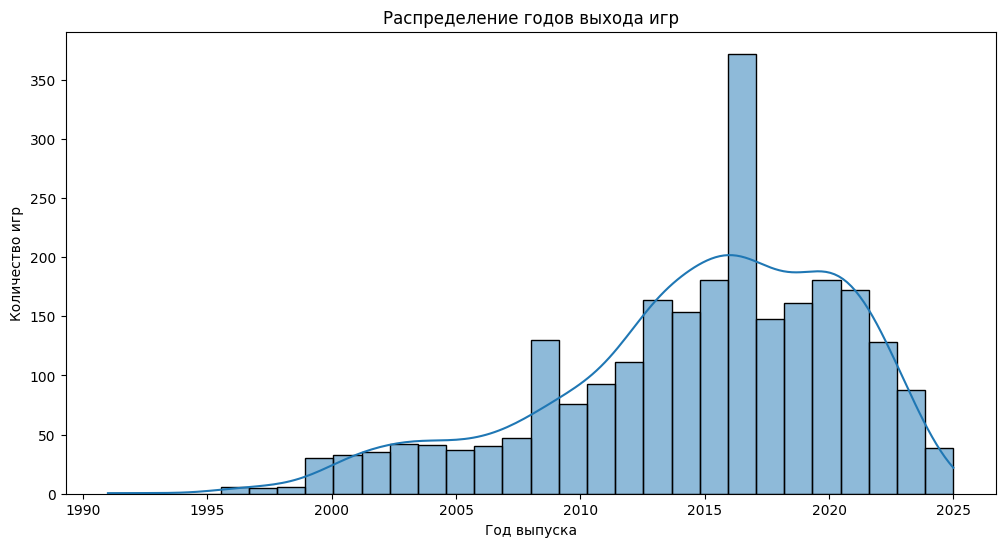

In [ ]:
# Анализ дат выхода игр
df_ars['release_year'] = pd.to_datetime(df_ars['released']).dt.year

plt.figure(figsize=(12, 6))
sns.histplot(df_ars['release_year'].dropna(), bins=30, kde=True)
plt.title("Распределение годов выхода игр")
plt.xlabel("Год выпуска")
plt.ylabel("Количество игр")
plt.show()

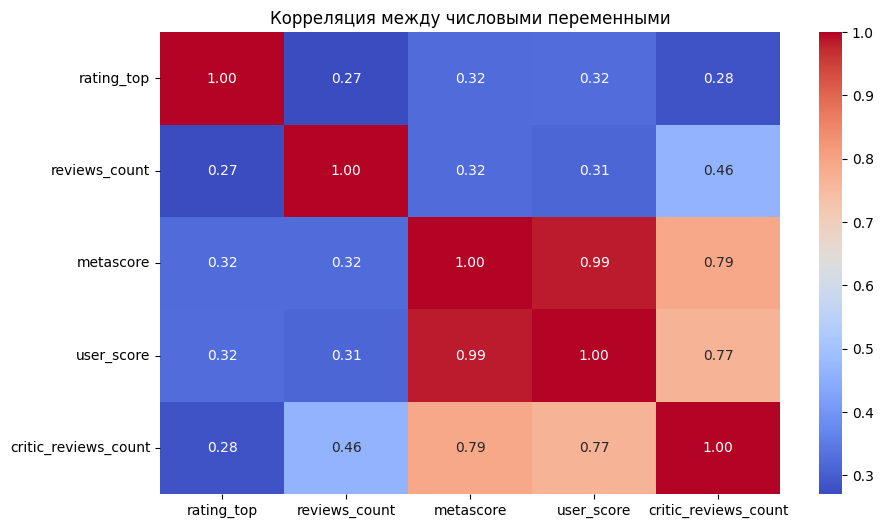

In [ ]:

numeric_columns = ['rating_top', 'reviews_count', 'metascore', 'user_score', 'critic_reviews_count']
correlation_matrix = df_ars[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция между числовыми переменными")
plt.show()

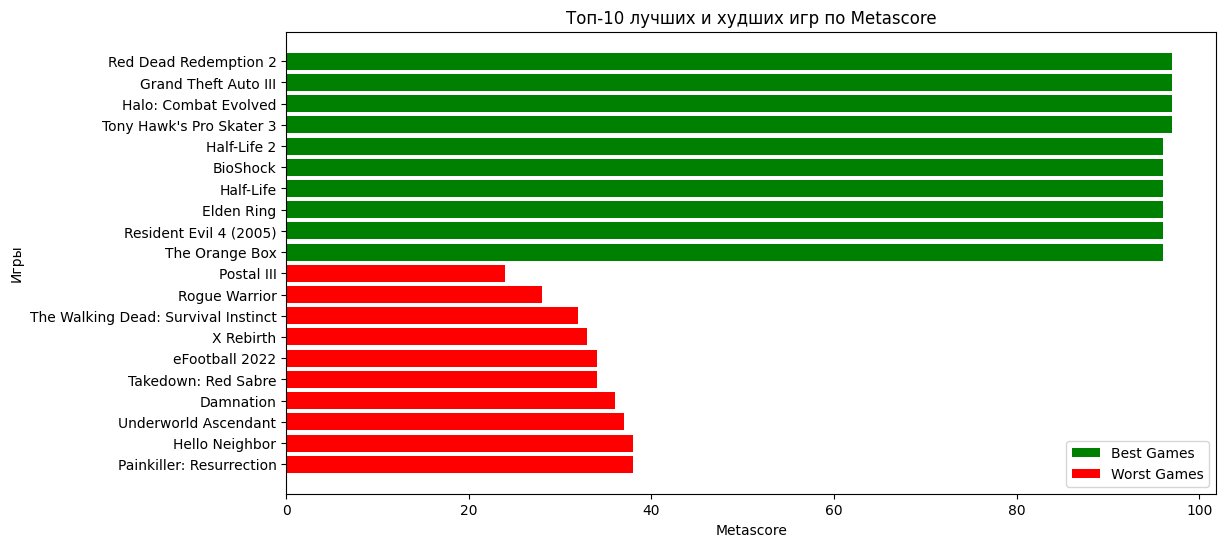

In [ ]:
# Отбираем только игры, у которых Metascore больше 0
df_filtered_metascore = df_ars[df_ars['metascore'] > 0]

# Топ-10 лучших игр по Metascore
top_10_best_filtered = df_filtered_metascore.nlargest(10, 'metascore')[['name', 'metascore', 'user_score', 'reviews_count']]

# Топ-10 худших игр по Metascore
top_10_worst_filtered = df_filtered_metascore.nsmallest(10, 'metascore')[['name', 'metascore', 'user_score', 'reviews_count']]

# Визуализация обновленного рейтинга
plt.figure(figsize=(12, 6))

# Топ-10 лучших
plt.barh(top_10_best_filtered['name'], top_10_best_filtered['metascore'], color='green', label='Best Games')
# Топ-10 худших
plt.barh(top_10_worst_filtered['name'], top_10_worst_filtered['metascore'], color='red', label='Worst Games')

plt.xlabel("Metascore")
plt.ylabel("Игры")
plt.title("Топ-10 лучших и худших игр по Metascore")
plt.legend()
plt.gca().invert_yaxis()
plt.show()


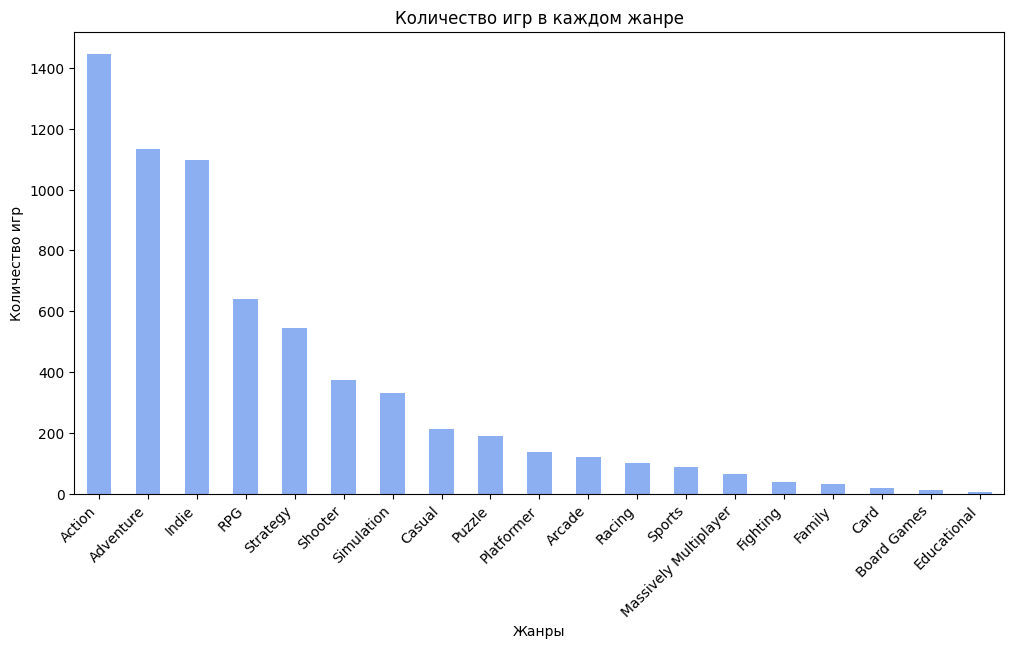

In [ ]:


    # Подсчитываем количество игр в каждом жанре
    genre_counts = df_genres_count['genres'].value_counts()

    # Визуализация количества игр по жанрам
    plt.figure(figsize=(12, 6))
    genre_counts.plot(kind='bar', color="cornflowerblue", alpha=0.75)
    plt.title("Количество игр в каждом жанре")
    plt.xlabel("Жанры")
    plt.ylabel("Количество игр")
    plt.xticks(rotation=45, ha="right")
    plt.show()

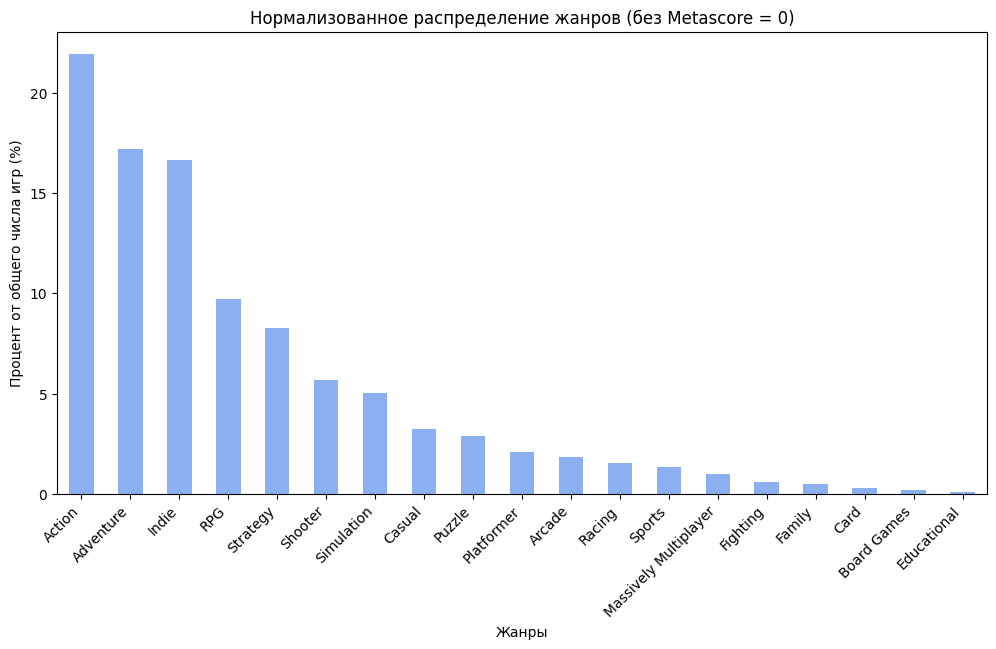

In [ ]:
# Проверяем, есть ли колонка 'genres' в датасете
if 'genres' in df_ars.columns:
    # Исключаем игры с Metascore = 0
    df_filtered = df_ars[df_ars['metascore'] > 0]

    # Разделяем жанры (если у одной игры несколько жанров, разделяем их)
    df_genres_count = df_filtered[['genres']].dropna()
    df_genres_count = df_genres_count.assign(genres=df_genres_count['genres'].str.split(', ')).explode('genres')

    # Подсчитываем количество игр в каждом жанре
    genre_counts = df_genres_count['genres'].value_counts()

    # Нормализуем количество игр в каждом жанре (процентное соотношение)
    genre_counts_normalized = genre_counts / genre_counts.sum() * 100

    # Визуализация нормализованного распределения жанров
    plt.figure(figsize=(12, 6))
    genre_counts_normalized.plot(kind='bar', color="cornflowerblue", alpha=0.75)
    plt.title("Нормализованное распределение жанров (без Metascore = 0)")
    plt.xlabel("Жанры")
    plt.ylabel("Процент от общего числа игр (%)")
    plt.xticks(rotation=45, ha="right")
    plt.show()

    # Пересчитываем средние оценки с учетом нормализации
    df_genres_normalized = df_filtered[['genres', 'metascore', 'user_score']].dropna()
    df_genres_normalized = df_genres_normalized.assign(genres=df_genres_normalized['genres'].str.split(', ')).explode('genres')
    df_genres_normalized['user_score'] = df_genres_normalized['user_score'] * 10
    # Усредняем оценки
    genre_scores_normalized = df_genres_normalized.groupby('genres').agg({'metascore': 'mean', 'user_score': 'mean'}).sort_values('metascore', ascending=False)

<Figure size 1500x700 with 0 Axes>

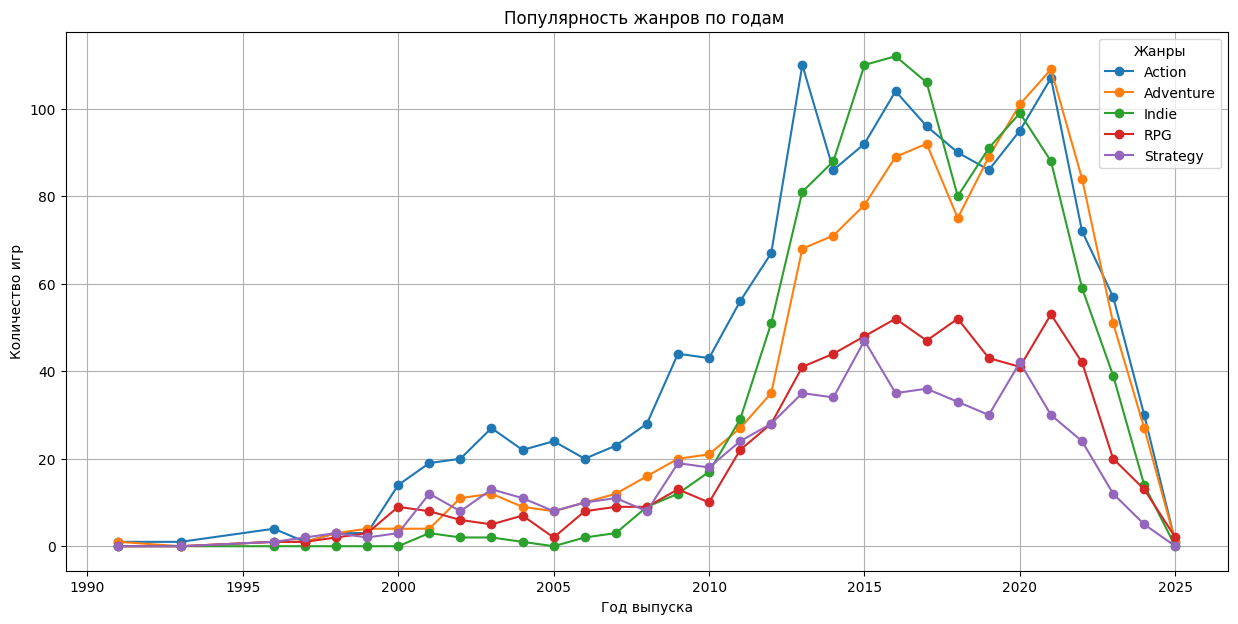

In [ ]:
# Преобразование даты выхода в формат datetime
df_ars['released'] = pd.to_datetime(df_ars['released'], format="%d.%m.%Y", errors='coerce')
df_ars['release_year'] = df_ars['released'].dt.year

# Умножаем User Score на 10 для корректного сравнения с Metascore
df_ars['user_score'] = df_ars['user_score'] * 10

# Исключение игр с Metascore = 0
df_ars = df_ars[df_ars['metascore'] > 0].copy()

# Преобразование жанров в списки
df_ars['genres'] = df_ars['genres'].astype(str).apply(lambda x: x.split(', ') if x != 'nan' else [])

# Фильтрация жанров с менее чем 100 играми
genre_counts = df_ars.explode('genres')['genres'].value_counts()
valid_genres = genre_counts[genre_counts >= 50].index

# Фильтрация датасета по жанрам с достаточным количеством игр
filtered_genre_trends = df_ars.explode('genres')
filtered_genre_trends = filtered_genre_trends[filtered_genre_trends['genres'].isin(valid_genres)]

# Группировка количества игр по годам и жанрам
genre_trends_filtered = filtered_genre_trends.groupby(['release_year', 'genres']).size().unstack().fillna(0)

# Визуализация динамики популярных жанров
plt.figure(figsize=(15, 7))
top_genres_filtered = genre_trends_filtered.sum().sort_values(ascending=False).head(5).index  # Топ-5 жанров
genre_trends_filtered[top_genres_filtered].plot(kind="line", marker="o", figsize=(15, 7))
plt.title("Популярность жанров по годам ")
plt.xlabel("Год выпуска")
plt.ylabel("Количество игр")
plt.legend(title="Жанры")
plt.grid(True)
plt.show()



Вывод:
Жанры RPG и Adventure – выгодные направления для инвестиций, так как высоко оцениваются и критиками, и игроками.
Strategy, несмотря на падение, удерживает высокий пользовательский рейтинг, что может означать возможность создания нишевых проектов.

In [ ]:
# Исключаем игры с metascore = 0 и приводим user_score к 100-бальной шкале
df_filtered = df_ars[(df_ars['metascore'] > 0) & (df_ars['user_score'] > 0)].copy()
df_filtered['user_score'] = df_filtered['user_score'] * 10

# Пересчитываем разницу между пользовательскими и критическими оценками
df_filtered['score_diff'] = df_filtered['user_score'] - df_filtered['metascore']

# Определяем игры с самым большим расхождением
top_discrepancies = df_filtered[['name', 'metascore', 'user_score', 'score_diff']]\
    .sort_values(by='score_diff', ascending=False)


top_discrepancies

,name,metascore,user_score,score_diff
3918,Hard Truck: Apocalypse,45.0,84.0,39.0
9696,Starpoint Gemini,46.0,84.0,38.0
7823,SuperPower 2,51.0,87.0,36.0
694,Cortex Command,44.0,73.0,29.0
5504,Original War,61.0,88.0,27.0
...,...,...,...,...
4029,Diaries of a Spaceport Janitor,69.0,9.0,-60.0
3203,NBA 2K18,80.0,19.0,-61.0
2106,Diablo IV,86.0,25.0,-61.0
1114,Overwatch 2,79.0,18.0,-61.0


<ipython-input-702-7140e419ebff>:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_filtered['release_year'] = pd.to_datetime(df_filtered['released'], errors='coerce').dt.year


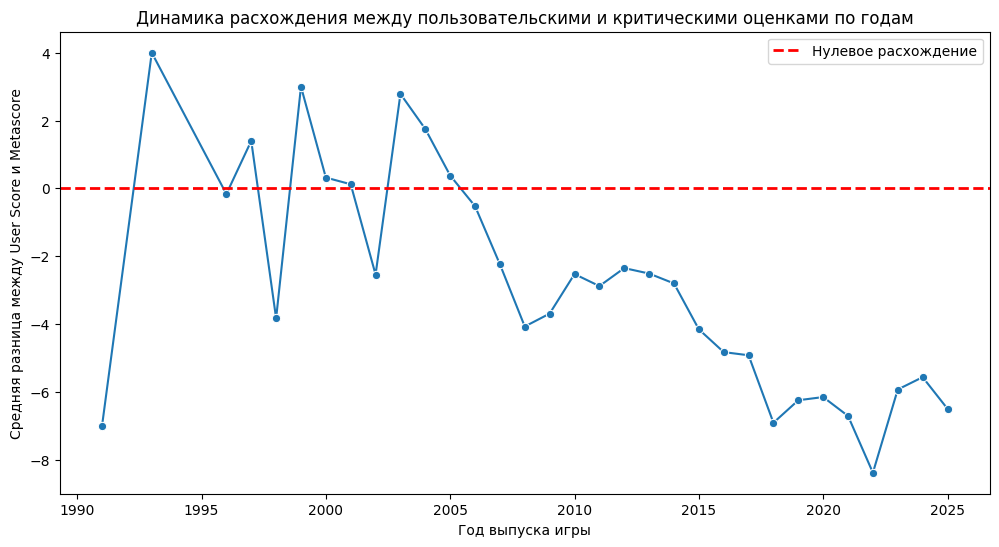

In [ ]:
# Преобразуем столбец 'released' в формат даты и выделим год выпуска
df_filtered['release_year'] = pd.to_datetime(df_filtered['released'], errors='coerce').dt.year

# Группируем данные по году выпуска и вычисляем среднее расхождение
yearly_diff = df_filtered.groupby('release_year')['score_diff'].mean()

# Строим график изменения расхождения по годам
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_diff.index, y=yearly_diff.values, marker="o", linestyle="-")
plt.axhline(0, color='red', linestyle='dashed', linewidth=2, label="Нулевое расхождение")
plt.xlabel('Год выпуска игры')
plt.ylabel('Средняя разница между User Score и Metascore')
plt.title('Динамика расхождения между пользовательскими и критическими оценками по годам')
plt.legend()
plt.show()


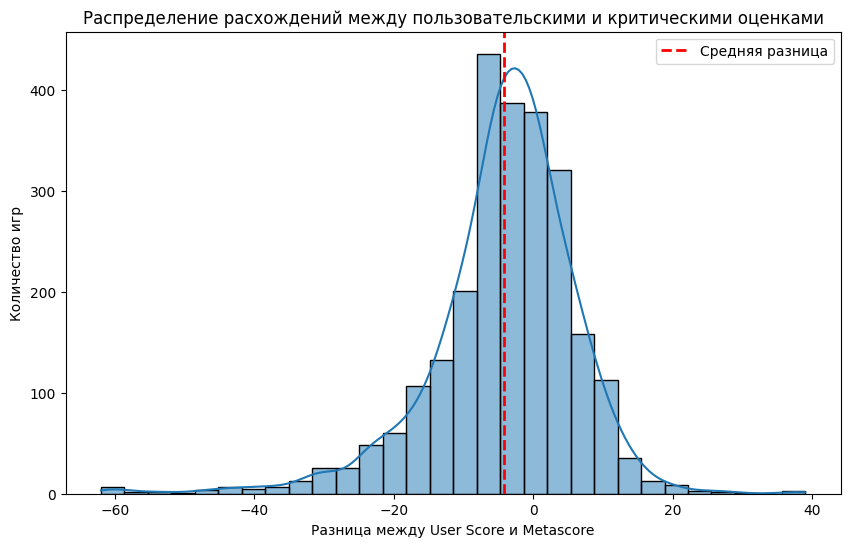

In [ ]:
# Строим распределение разницы между пользовательскими и критическими оценками
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['score_diff'], bins=30, kde=True)
plt.axvline(df_filtered['score_diff'].mean(), color='red', linestyle='dashed', linewidth=2, label="Средняя разница")
plt.xlabel('Разница между User Score и Metascore')
plt.ylabel('Количество игр')
plt.title('Распределение расхождений между пользовательскими и критическими оценками')
plt.legend()
plt.show()


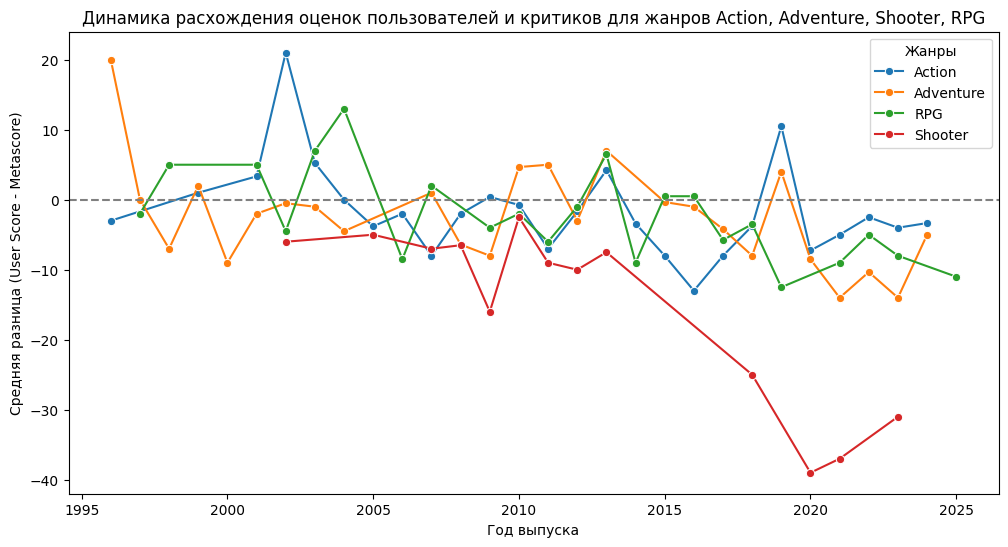

In [ ]:
selected_genres = ["Action", "Adventure", "Shooter", "RPG"]
df_selected_genres = df_filtered[df_filtered['genres'].isin(selected_genres)]

# Группируем данные по годам и жанрам, усредняя разницу оценок
genre_score_diff_trend = df_selected_genres.groupby(['release_year', 'genres'], as_index=False)['score_diff'].mean()

# Визуализируем исправленную динамику расхождения оценок по годам
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_score_diff_trend, x='release_year', y='score_diff', hue='genres', marker='o')
plt.axhline(0, color='gray', linestyle='dashed')  # Линия нулевого расхождения
plt.xlabel("Год выпуска")
plt.ylabel("Средняя разница (User Score - Metascore)")
plt.title("Динамика расхождения оценок пользователей и критиков для жанров Action, Adventure, Shooter, RPG")
plt.legend(title="Жанры")
plt.show()

In [ ]:
# Разделим магазины, развернув их в отдельные строки
df_exploded_stores = df_filtered.dropna(subset=['stores']).copy()
df_exploded_stores['stores'] = df_exploded_stores['stores'].str.split(', ')
df_exploded_stores = df_exploded_stores.explode('stores')

# Группируем данные по магазинам и вычисляем средний metascore и user_score
store_ratings = df_exploded_stores.groupby('stores')[['metascore', 'user_score']].mean().sort_values(by='metascore', ascending=False)

<ipython-input-784-0b258af166df>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_counts.head(10).index, y=store_counts.head(10).values, palette="Blues_r")


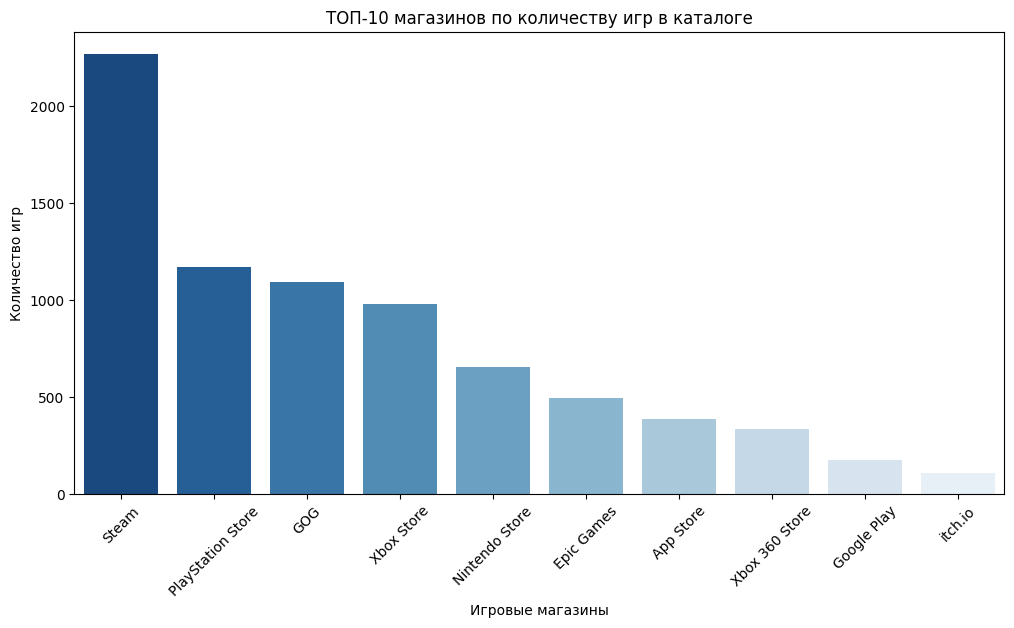

In [ ]:
# Подсчитаем количество игр в каждом магазине
store_counts = df_exploded_stores['stores'].value_counts()

# Визуализируем топ-10 магазинов по количеству игр
plt.figure(figsize=(12, 6))
sns.barplot(x=store_counts.head(10).index, y=store_counts.head(10).values, palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Игровые магазины")
plt.ylabel("Количество игр")
plt.title("ТОП-10 магазинов по количеству игр в каталоге")
plt.show()


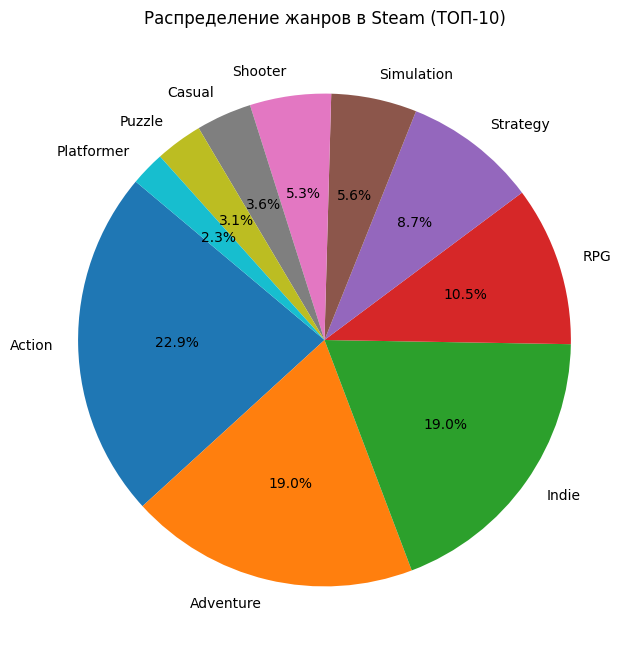

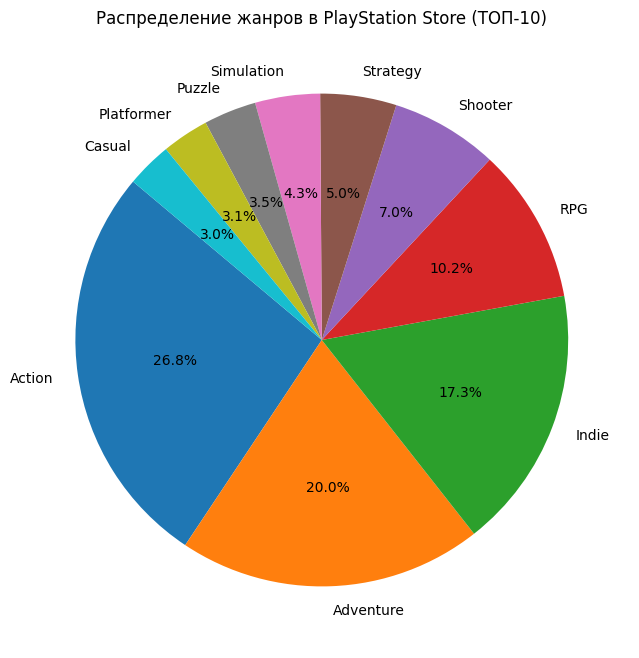

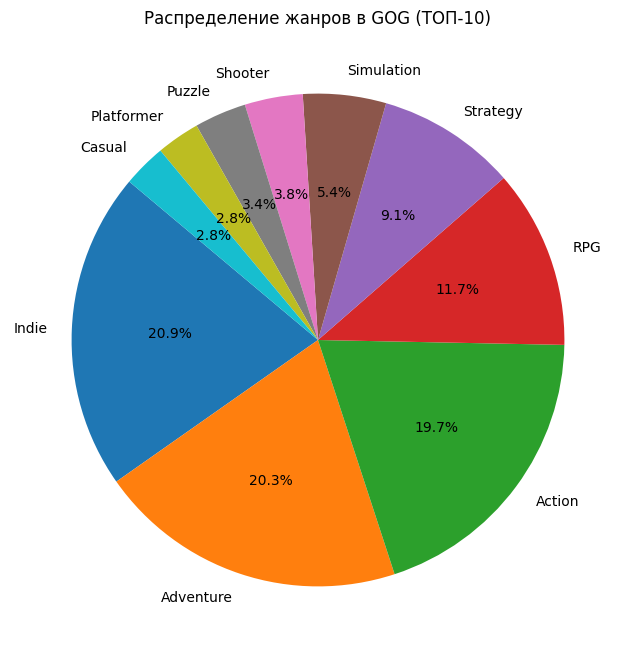

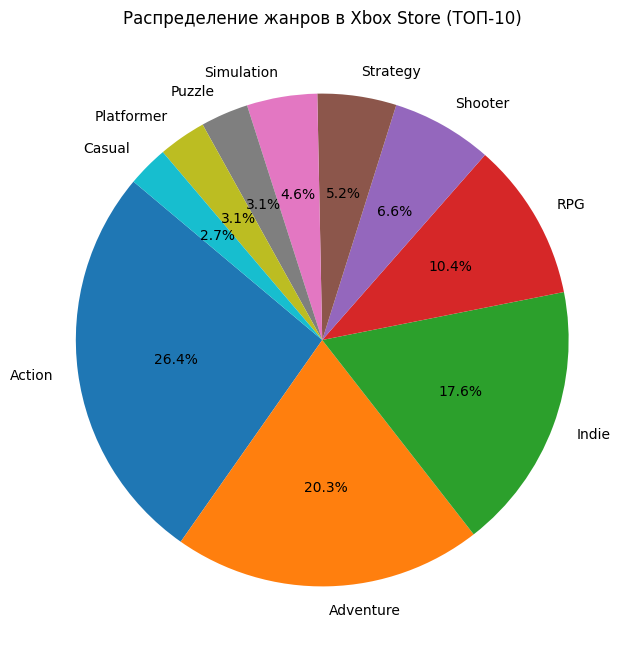

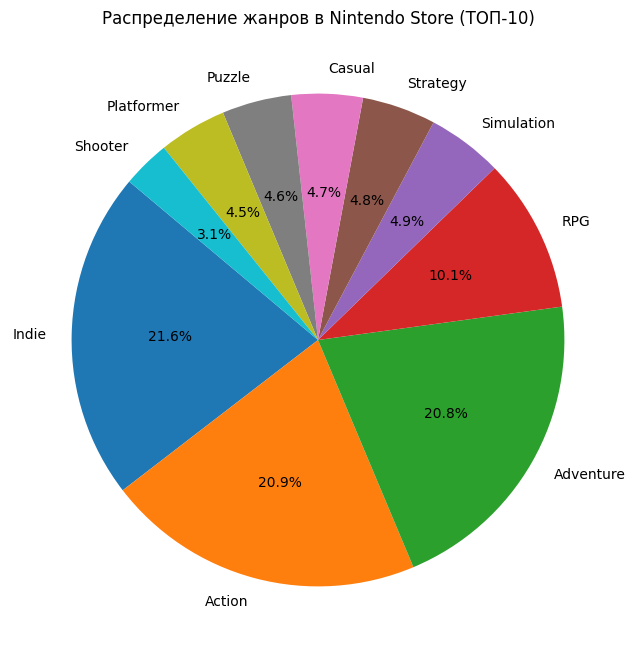

In [ ]:
# Разделим жанры, развернув их в отдельные строки
df_exploded_stores_genres = df_exploded_stores.dropna(subset=['genres']).copy()
df_exploded_stores_genres['genres'] = df_exploded_stores_genres['genres'].str.split(', ')
df_exploded_stores_genres = df_exploded_stores_genres.explode('genres')

# Выберем ТОП-5 магазинов по количеству игр
top_5_stores = store_counts.head(5).index

# Построим круговые диаграммы для каждого магазина
for store in top_5_stores:
    store_genre_counts = df_exploded_stores_genres[df_exploded_stores_genres['stores'] == store]['genres'].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(store_genre_counts[:10], labels=store_genre_counts.index[:10], autopct='%1.1f%%', startangle=140)
    plt.title(f'Распределение жанров в {store} (ТОП-10)')
    plt.show()


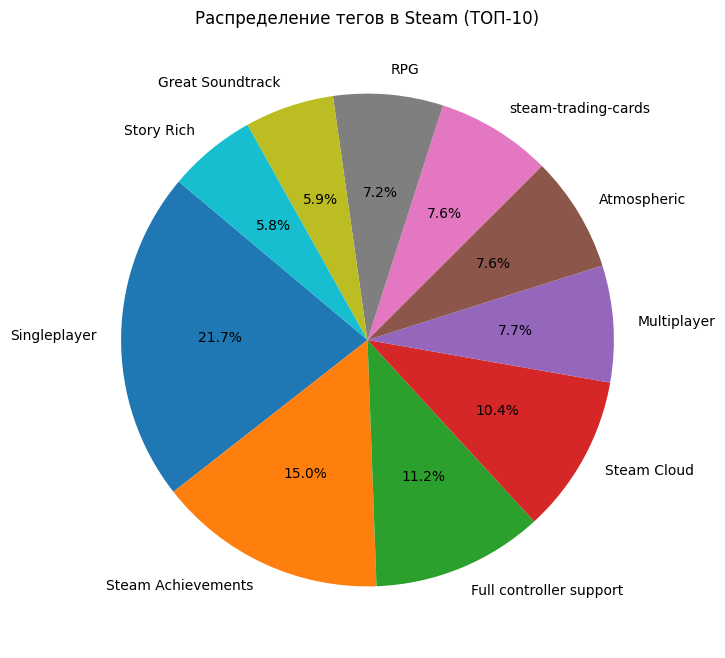

In [ ]:
# Фильтруем данные только для игр, доступных в Steam
df_steam = df_exploded_stores_genres[df_exploded_stores_genres['stores'] == 'Steam']

# Разделим теги, развернув их в отдельные строки
df_steam_tags = df_steam.dropna(subset=['tags']).copy()
df_steam_tags['tags'] = df_steam_tags['tags'].str.split(', ')
df_steam_tags = df_steam_tags.explode('tags')

# Подсчитаем количество игр по тегам в Steam
steam_tag_counts = df_steam_tags['tags'].value_counts()

# Построим круговую диаграмму для ТОП-10 тегов
plt.figure(figsize=(8, 8))
plt.pie(steam_tag_counts[:10], labels=steam_tag_counts.index[:10], autopct='%1.1f%%', startangle=140)
plt.title('Распределение тегов в Steam (ТОП-10)')
plt.show()


<ipython-input-762-e2b79d083275>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_tags_per_genre = genre_tag_counts_selected.groupby("genres").apply(lambda x: x.nlargest(15, 'count')).reset_index(drop=True)


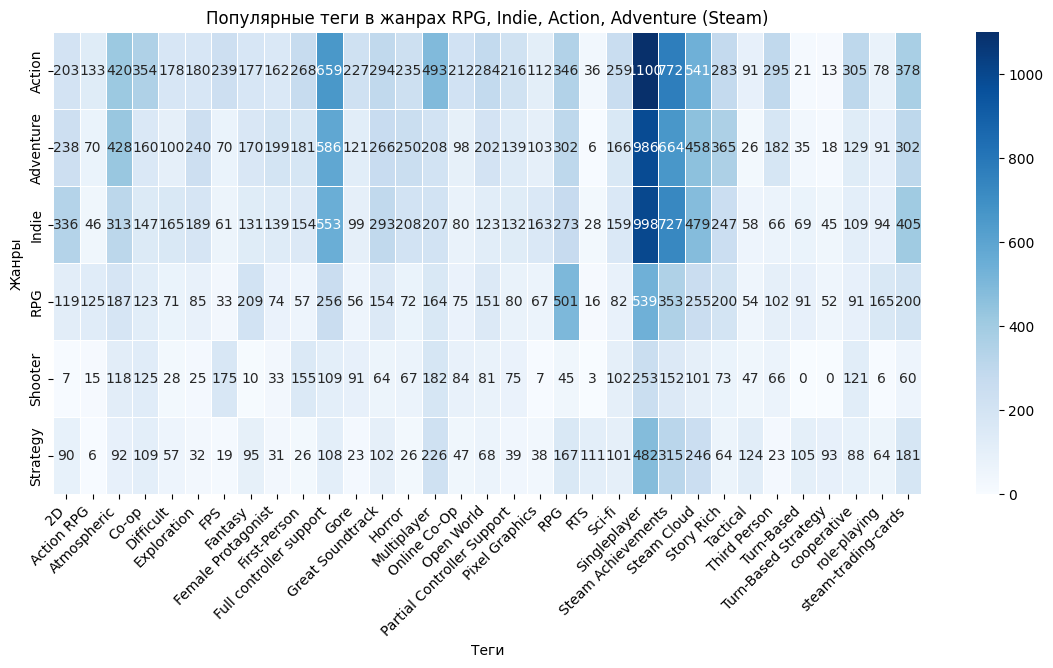

In [ ]:
# Выбираем интересующие нас жанры
selected_genres = ["RPG", "Indie", "Action", "Adventure","Shooter","Strategy"]
df_selected_genres = df_steam_tags[df_steam_tags['genres'].isin(selected_genres)]

# Подсчитаем количество упоминаний тегов для каждого жанра
genre_tag_counts_selected = df_selected_genres.groupby(['genres', 'tags']).size().reset_index(name='count')

# Ограничим количество наиболее популярных тегов для удобочитаемости
top_tags_per_genre = genre_tag_counts_selected.groupby("genres").apply(lambda x: x.nlargest(15, 'count')).reset_index(drop=True)

# Фильтруем по топ-15 тегов в каждом жанре
filtered_tags = genre_tag_counts_selected[genre_tag_counts_selected["tags"].isin(top_tags_per_genre["tags"].unique())]

# Перестраиваем сводную таблицу
pivot_table_selected = filtered_tags.pivot(index="genres", columns="tags", values="count").fillna(0)

# Улучшенный график тепловой карты
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table_selected, cmap="Blues", linewidths=0.5, annot=True, fmt=".0f")
plt.xlabel("Теги")
plt.ylabel("Жанры")
plt.title("Популярные теги в жанрах RPG, Indie, Action, Adventure (Steam)")
plt.xticks(rotation=45, ha="right")
plt.show()


<ipython-input-763-52efc1874d5e>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genres_per_tag = tag_genre_counts_selected.groupby("tags").apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


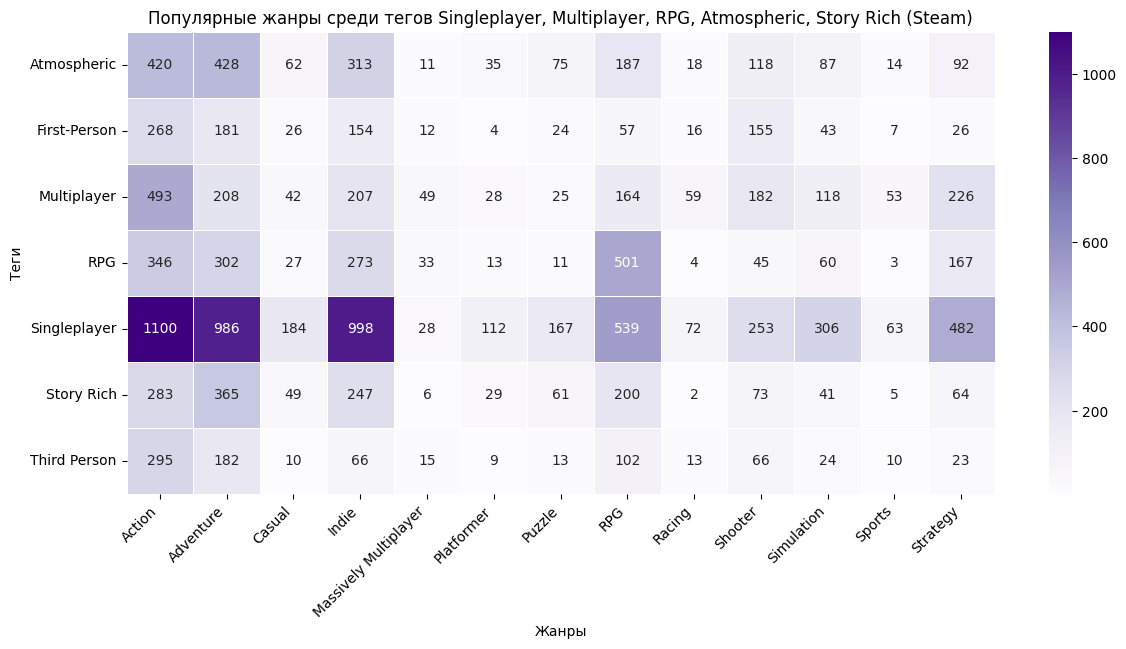

In [ ]:
# Выбираем интересующие нас теги
selected_tags = ["Singleplayer", "Multiplayer", "RPG", "Atmospheric", "Story Rich","First-Person","Third Person"]
df_selected_tags = df_steam_tags[df_steam_tags['tags'].isin(selected_tags)]

# Подсчитаем количество упоминаний жанров для каждого тега
tag_genre_counts_selected = df_selected_tags.groupby(['tags', 'genres']).size().reset_index(name='count')

# Ограничим количество наиболее популярных жанров для удобочитаемости
top_genres_per_tag = tag_genre_counts_selected.groupby("tags").apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

# Фильтруем по топ-10 жанров в каждом теге
filtered_genres = tag_genre_counts_selected[tag_genre_counts_selected["genres"].isin(top_genres_per_tag["genres"].unique())]

# Перестраиваем сводную таблицу
pivot_table_selected = filtered_genres.pivot(index="tags", columns="genres", values="count").fillna(0)

# Улучшенный график тепловой карты
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table_selected, cmap="Purples", linewidths=0.5, annot=True, fmt=".0f")
plt.xlabel("Жанры")
plt.ylabel("Теги")
plt.title("Популярные жанры среди тегов Singleplayer, Multiplayer, RPG, Atmospheric, Story Rich (Steam)")
plt.xticks(rotation=45, ha="right")
plt.show()


<ipython-input-764-a49344298136>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=successful_tags_counts.head(15).values, y=successful_tags_counts.head(15).index, palette="Greens_r")


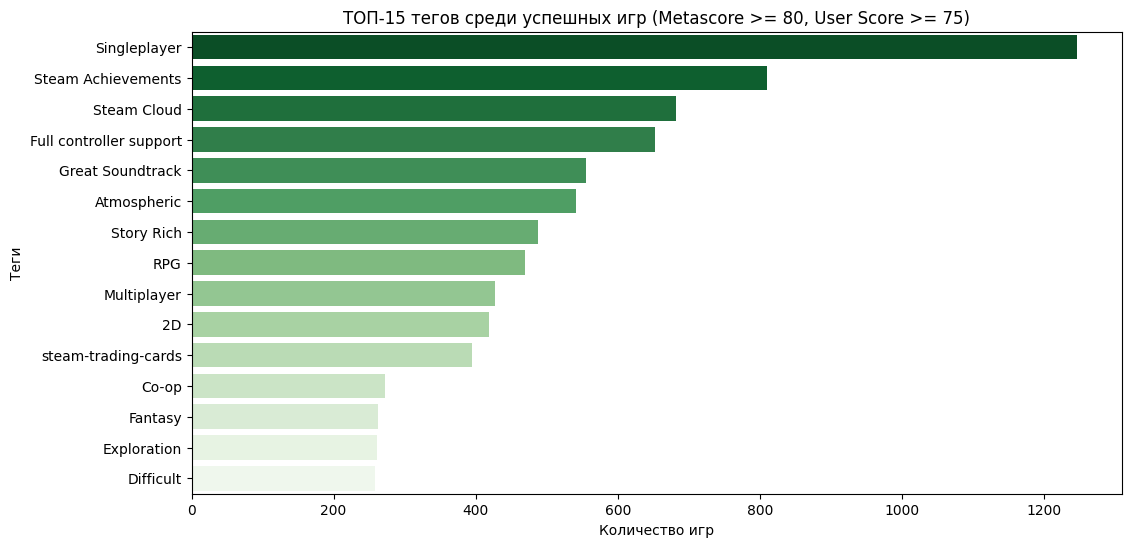

In [ ]:
# Определим успешные игры (например, Metascore >= 80 и User Score >= 75)
successful_games = df_steam_tags[(df_steam_tags['metascore'] >= 80) & (df_steam_tags['user_score'] >= 75)]

# Подсчитаем количество упоминаний тегов среди успешных игр
successful_tags_counts = successful_games['tags'].value_counts()

# Отобразим топ-15 тегов среди успешных игр
plt.figure(figsize=(12, 6))
sns.barplot(x=successful_tags_counts.head(15).values, y=successful_tags_counts.head(15).index, palette="Greens_r")
plt.xlabel("Количество игр")
plt.ylabel("Теги")
plt.title("ТОП-15 тегов среди успешных игр (Metascore >= 80, User Score >= 75)")
plt.show()



RPG: доминируют теги, связанные с фэнтези, открытым миром, прокачкой персонажа.
Indie: часто встречаются "пиксель-арт", "2D", "экспериментальные механики", что логично для независимых разработчиков.
Action: преобладают "шутер", "динамика", "реализм", что соответствует жанру.
Adventure: здесь больше тегов, связанных с сюжетной линией, квестами, головоломками.
Это подтверждает, что в каждом жанре игроки ожидают определенные механики, и разработчикам стоит учитывать популярные теги при позиционировании игры.

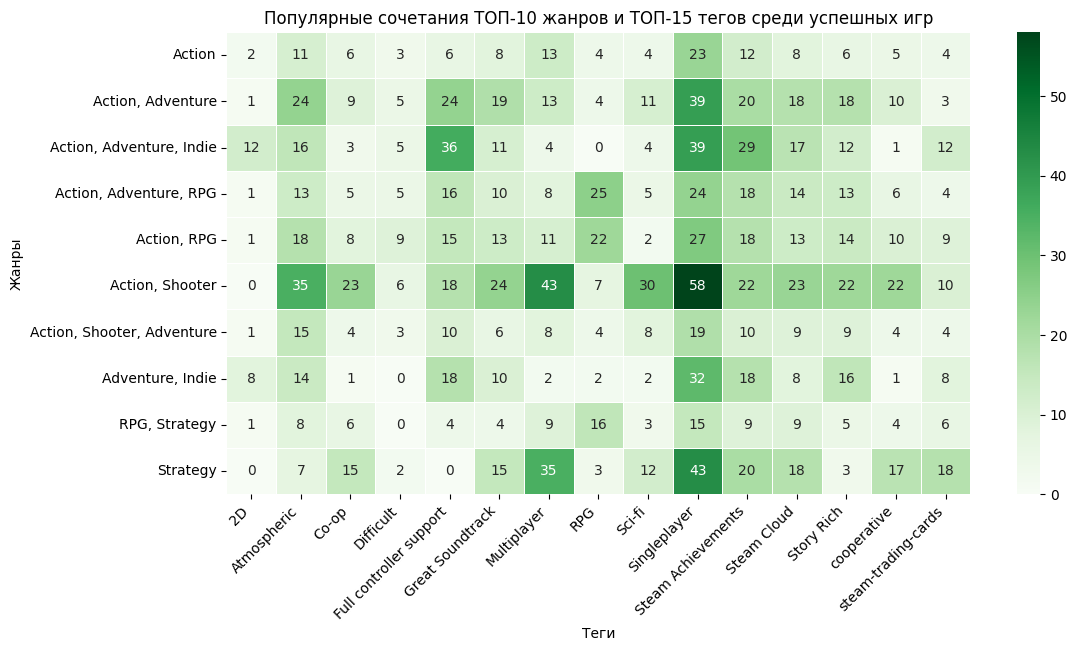

In [ ]:
# Исключение игр с Metascore = 0
df_ars = df_ars[df_ars['metascore'] > 0].copy()

# Приводим user_score к 100-балльной шкале
df_ars['user_score'] = df_ars['user_score'] * 10

# Разделяем теги, развернув их в отдельные строки
df_ars['tags'] = df_ars['tags'].fillna("").astype(str).str.split(', ')
df_steam_tags = df_ars.explode('tags')

# Фильтруем успешные игры (Metascore ≥ 75 и User Score ≥ 70)
successful_games = df_steam_tags[(df_steam_tags['metascore'] >= 75) & (df_steam_tags['user_score'] >= 70)]

# Группируем успешные игры по жанрам и тегам, подсчитываем количество упоминаний
successful_genre_tag_counts = successful_games.groupby(['genres', 'tags']).size().reset_index(name='count')

# Определяем топ-10 самых популярных жанров среди успешных игр
top_10_successful_genres = successful_genre_tag_counts['genres'].value_counts().head(10).index

# Определяем топ-15 самых популярных тегов среди успешных игр
top_15_successful_tags = successful_genre_tag_counts['tags'].value_counts().head(15).index

# Фильтруем данные только по этим жанрам и тегам
successful_genre_tag_filtered = successful_genre_tag_counts[
    (successful_genre_tag_counts['genres'].isin(top_10_successful_genres)) &
    (successful_genre_tag_counts['tags'].isin(top_15_successful_tags))
]

# Проверяем, остались ли данные после фильтрации
if not successful_genre_tag_filtered.empty:
    # Перестраиваем сводную таблицу
    pivot_successful_genres_tags = successful_genre_tag_filtered.pivot(index='genres', columns='tags', values='count').fillna(0)

    # Визуализируем тепловую карту
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_successful_genres_tags, cmap="Greens", linewidths=0.5, annot=True, fmt=".0f")
    plt.xlabel("Теги")
    plt.ylabel("Жанры")
    plt.title("Популярные сочетания ТОП-10 жанров и ТОП-15 тегов среди успешных игр")
    plt.xticks(rotation=45, ha="right")
    plt.show()


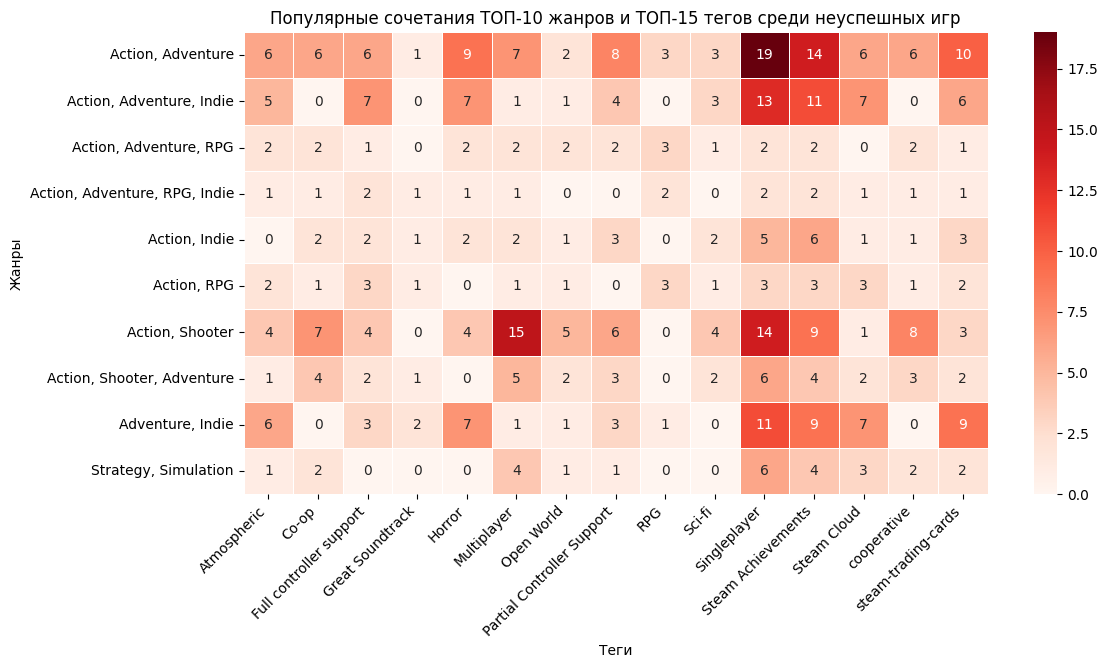

In [ ]:
unsuccessful_games = df_steam_tags[df_steam_tags['metascore'] < 60]


unsuccessful_genre_tag_counts = unsuccessful_games.groupby(['genres', 'tags']).size().reset_index(name='count')

# Определяем топ-10 самых частых жанров среди неуспешных игр
top_10_unsuccessful_genres = unsuccessful_genre_tag_counts['genres'].value_counts().head(10).index

# Определяем топ-15 самых частых тегов среди неуспешных игр
top_15_unsuccessful_tags = unsuccessful_genre_tag_counts['tags'].value_counts().head(15).index

# Фильтруем данные только по этим жанрам и тегам
unsuccessful_genre_tag_filtered = unsuccessful_genre_tag_counts[
    (unsuccessful_genre_tag_counts['genres'].isin(top_10_unsuccessful_genres)) &
    (unsuccessful_genre_tag_counts['tags'].isin(top_15_unsuccessful_tags))
]


pivot_unsuccessful_genres_tags = unsuccessful_genre_tag_filtered.pivot(index='genres', columns='tags', values='count').fillna(0)

    # Визуализируем тепловую карт
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_unsuccessful_genres_tags, cmap="Reds", linewidths=0.5, annot=True, fmt=".0f")
plt.xlabel("Теги")
plt.ylabel("Жанры")
plt.title("Популярные сочетания ТОП-10 жанров и ТОП-15 тегов среди неуспешных игр")
plt.xticks(rotation=45, ha="right")
plt.show()

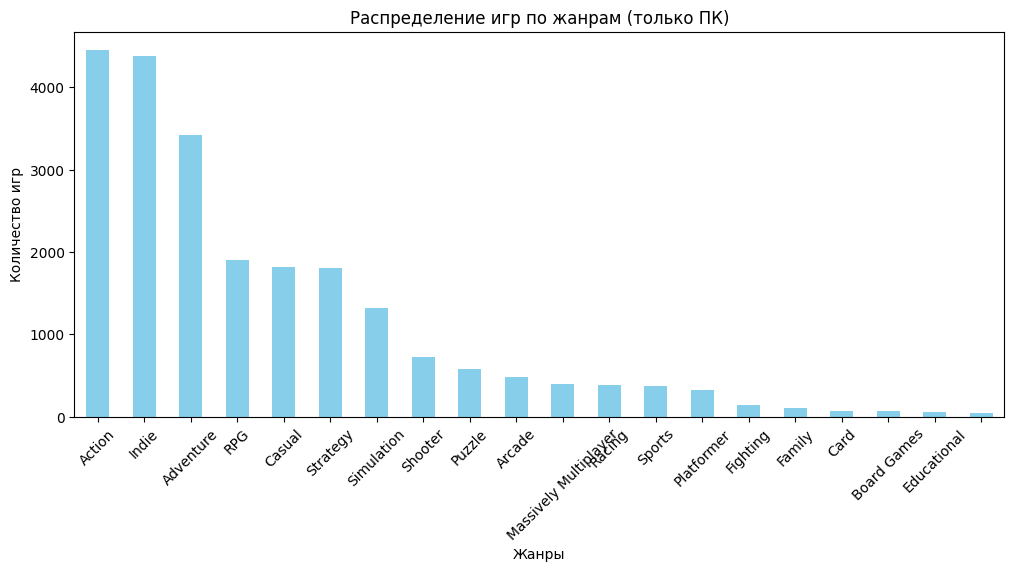

In [ ]:
import matplotlib.pyplot as plt

# Разделяем жанры и создаем новый DataFrame для анализа по жанрам
df_genres = df_ars.assign(genres=df['genres'].str.split(',')).explode('genres')
df_genres['genres'] = df_genres['genres'].str.strip()

# Подсчитаем количество игр в каждом жанре
genre_counts = df_genres['genres'].value_counts()

# Визуализируем количество игр по жанрам
plt.figure(figsize=(12, 5))
genre_counts.plot(kind='bar', color='skyblue')
plt.title("Распределение игр по жанрам (только ПК)")
plt.xlabel("Жанры")
plt.ylabel("Количество игр")
plt.xticks(rotation=45)
plt.show()

#Action и Indie – самые конкурентные жанры, где сложно выделиться.
#Нишевая стратегия: Puzzle, Family, Board Games – их меньше, но при хорошем качестве можно добиться успеха.
#RPG и Strategy – сильный выбор, если важен баланс популярности и качества.

<Figure size 1200x600 with 0 Axes>

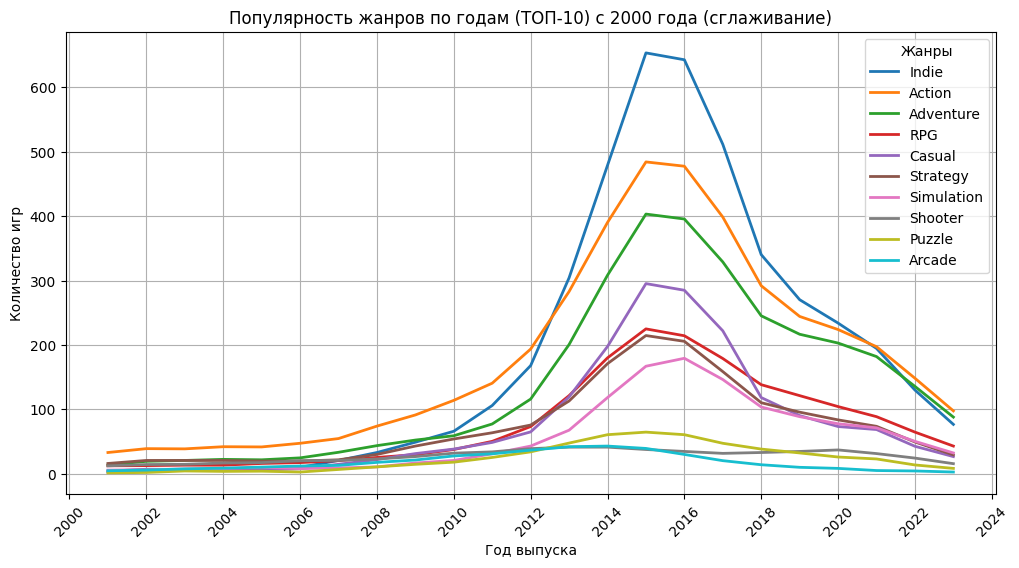

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Разделяем жанры и создаем новый DataFrame для анализа по жанрам
df_genres = df_ars.assign(genres=df['genres'].str.split(',')).explode('genres')
df_genres['genres'] = df_genres['genres'].str.strip()

# Добавляем столбец release_year в df_genres
df_genres["release_year"] = df_ars["release_year"]

# Подсчитаем количество игр в каждом жанре по годам
genre_trends = df_genres.groupby(["release_year", "genres"]).size().unstack(fill_value=0)

# Фильтруем данные, начиная с 2000 года
genre_trends_filtered = genre_trends.loc[(genre_trends.index >= 2000) & (genre_trends.index < 2025)]

# Определяем ТОП-10 самых популярных жанров по сумме всех лет
top_genres = genre_trends_filtered.sum().sort_values(ascending=False).head(10).index

# Преобразуем годы в целые числа для корректного отображения
genre_trends_filtered.index = genre_trends_filtered.index.astype(int)

# Применяем сглаживание с использованием скользящего среднего (window=3)
genre_trends_smoothed = genre_trends_filtered.rolling(window=3, center=True).mean()

# Визуализируем изменение популярности жанров со сглаживанием
plt.figure(figsize=(12, 6))
genre_trends_smoothed[top_genres].plot(figsize=(12, 6), linewidth=2)

plt.title("Популярность жанров по годам (ТОП-10) с 2000 года (сглаживание)")
plt.xlabel("Год выпуска")
plt.ylabel("Количество игр")
plt.legend(title="Жанры")

# Обновляем разметку оси X (только целые числа с шагом 2 года)
plt.xticks(ticks=genre_trends_filtered.index[::2], labels=genre_trends_filtered.index[::2], rotation=45)

plt.grid(True)
plt.show()


#Если хотите сделать игру для широкой аудитории, выбирайте Action или RPG, но добавьте уникальный элемент.
#Если хотите игру с меньшей конкуренцией, подумайте о Strategy или Simulation.
#Если хотите инди-игру, вам нужна уникальная идея – рынок инди перегружен.

<Figure size 1200x600 with 0 Axes>

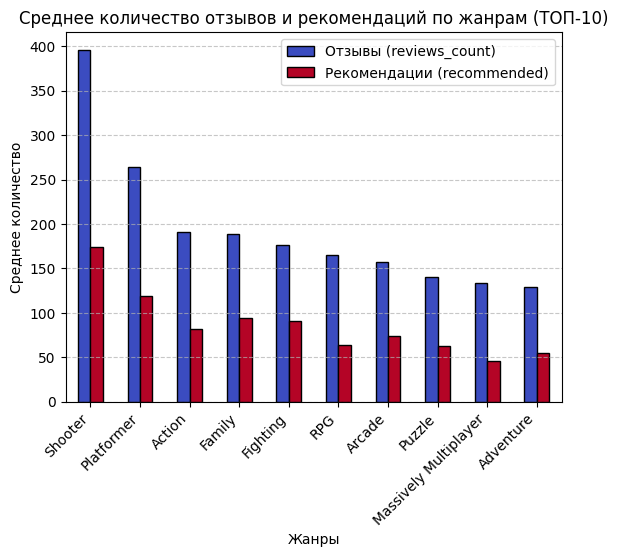

In [ ]:
# Группируем данные по жанрам и считаем среднее количество отзывов и рекомендаций
genre_reviews = df_genres.groupby("genres")[["reviews_count", "recommended"]].mean()

# Визуализация
plt.figure(figsize=(12, 6))
genre_reviews.sort_values("reviews_count", ascending=False).head(10).plot(kind="bar", colormap="coolwarm", edgecolor="black")
plt.title("Среднее количество отзывов и рекомендаций по жанрам (ТОП-10)")
plt.xlabel("Жанры")
plt.ylabel("Среднее количество")
plt.xticks(rotation=45, ha="right")
plt.legend(["Отзывы (reviews_count)", "Рекомендации (recommended)"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<Figure size 1200x600 with 0 Axes>

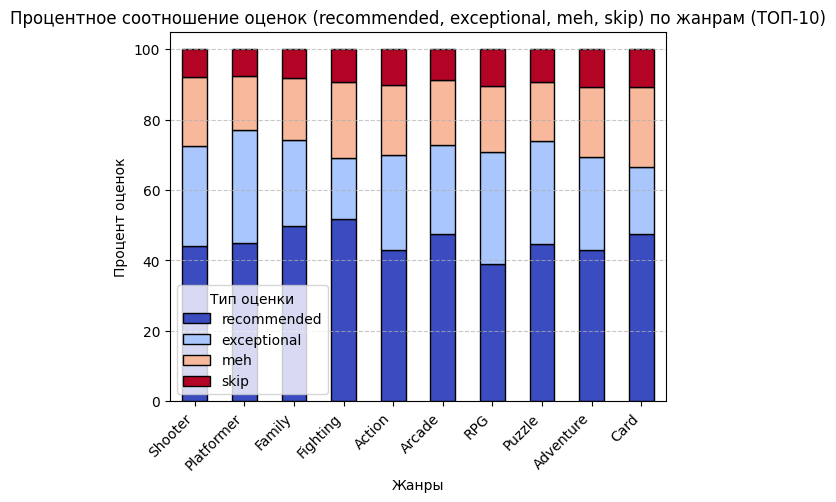

In [ ]:
# Группируем данные по жанрам и считаем среднее количество оценок каждого типа
genre_ratings = df_genres.groupby("genres")[["recommended", "exceptional", "meh", "skip"]].mean()

# Нормируем данные, чтобы получить процентное соотношение (каждая колонка / сумма)
genre_ratings_percentage = genre_ratings.div(genre_ratings.sum(axis=1), axis=0) * 100

# Выбираем ТОП-10 жанров с наибольшим числом рекомендаций
top_genres = genre_ratings["recommended"].sort_values(ascending=False).head(10).index

# Визуализируем распределение отзывов в процентах
plt.figure(figsize=(12, 6))
genre_ratings_percentage.loc[top_genres].plot(kind="bar", stacked=True, colormap="coolwarm", edgecolor="black")

plt.title("Процентное соотношение оценок (recommended, exceptional, meh, skip) по жанрам (ТОП-10)")
plt.xlabel("Жанры")
plt.ylabel("Процент оценок")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Тип оценки")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


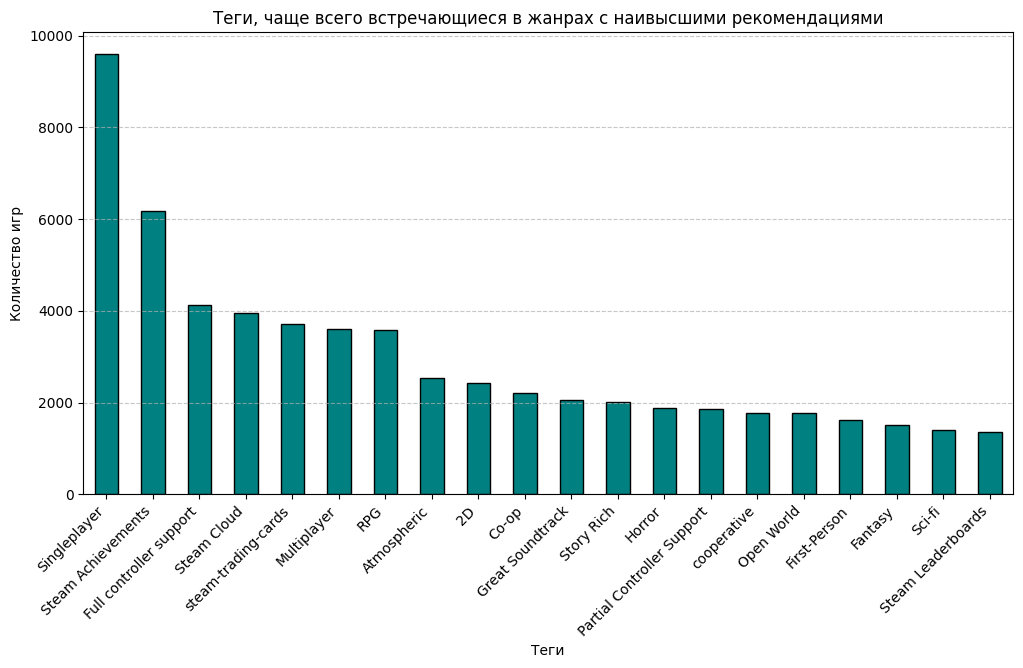

In [ ]:
top_recommended_genres = df_genres.groupby("genres")["recommended"].mean().sort_values(ascending=False).head(10).index

# Отбираем только игры из этих жанров
df_top_recommended = df_genres[df_genres["genres"].isin(top_recommended_genres)]

# Разделяем теги на отдельные строки и считаем частоту
df_tags = df_top_recommended.assign(tags=df_top_recommended["tags"].str.split(",")).explode("tags")
df_tags["tags"] = df_tags["tags"].str.strip()

# Подсчитываем популярные теги
tag_counts = df_tags["tags"].value_counts().head(20)

# Визуализируем
plt.figure(figsize=(12, 6))
tag_counts.plot(kind="bar", color="teal", edgecolor="black")
plt.title("Теги, чаще всего встречающиеся в жанрах с наивысшими рекомендациями")
plt.xlabel("Теги")
plt.ylabel("Количество игр")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

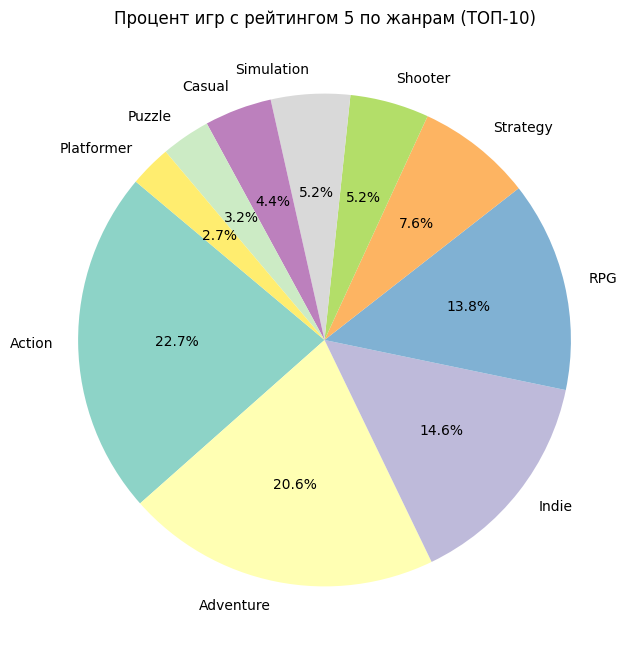

In [ ]:
# Определяем процент игр с рейтингом 5 по жанрам
top_rated_genres = df_genres[df_genres["rating_top"] == 5]["genres"].value_counts(normalize=True).head(10)

# Визуализируем
plt.figure(figsize=(8, 8))
top_rated_genres.plot(kind="pie", autopct="%1.1f%%", startangle=140, colormap="Set3")
plt.title("Процент игр с рейтингом 5 по жанрам (ТОП-10)")
plt.ylabel("")
plt.show()
